# MH Sampling

**Import required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.lines import Line2D
%matplotlib inline

**Define p(z) using multivariate_normal**

In [2]:
def p(z):
    return multivariate_normal.pdf(z, [4, 4], [[1, 0.8],[0.8, 1]])

**Define q(z, z', $\sigma^2$)**

In [3]:
def q(z, z_, sigma2):
    return multivariate_normal.pdf(z, z_, sigma2)

**Define functions to find mean and covariance of data**

In [18]:
def findSampleMean(samples):
    return samples.mean(axis=0)

def findSampleCov(samples, sample_mean):
    return 1/samples.shape[0]*(samples - sample_mean).T@(samples - sample_mean)

**MH Sampler**

In [34]:
def MH_sampler(z_, sigma2):
    cov = sigma2*np.eye(2)
    samples_generated = list()
    count = 0
    n_samples = 0
    while n_samples <= 10000:
        count += 1
        z = np.random.multivariate_normal(z_, cov)
        u = np.random.uniform()
        A_ = (p(z)*q(z_, z, sigma2))/(p(z_)*q(z, z_, sigma2))
        A = min(1, A_)
        if u < A:
            samples_generated.append(z)
            n_samples += 1
            z_ = z
            if n_samples in [100, 1000, 10000]:
                samples = np.array(samples_generated)
                sample_mean = findSampleMean(samples)
                sample_cov = findSampleCov(samples, sample_mean)
                plt.figure(figsize=(10,10))
                x, y = np.mgrid[-2:8:.01, -2:8:.01]
                pos = np.dstack((x, y))
                plt.plot(samples[:, 0], samples[:, 1], marker="+", markersize=2, alpha=0.5)
                custom_lines = [Line2D([0], [0], color="green", lw=4),
                                Line2D([0], [0], color="blue", lw=4),
                                Line2D([0], [0], color="red", lw=4)]
                plt.contour(x, y, p(pos), levels=[0.03], colors="green", linewidths=3)
                plt.contour(x, y, q(pos, sample_mean, sample_cov), levels=[0.03], colors="blue", linewidths=3)
                plt.legend(custom_lines, ['p(z)', 'p_hat(z)', 'samples'])
                text = "Samples="+str(n_samples)+" var="+str(sigma2)
                plt.title(text)
                plt.savefig(text+'.png')
                plt.show()
    return 1 - n_samples/count

**Sample using different variance**

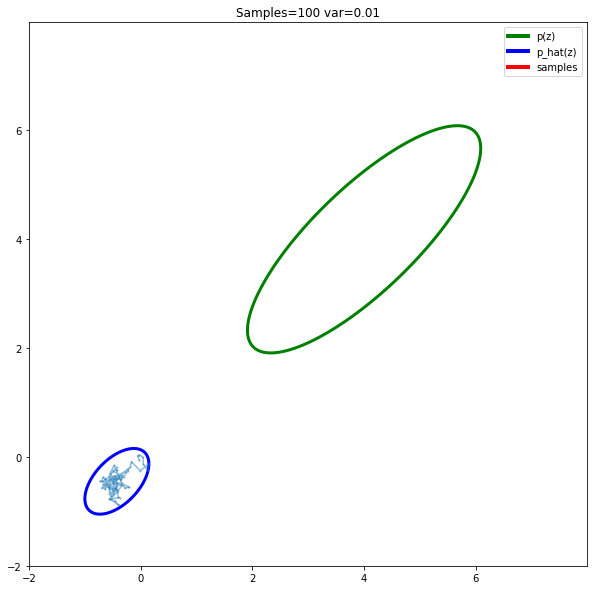

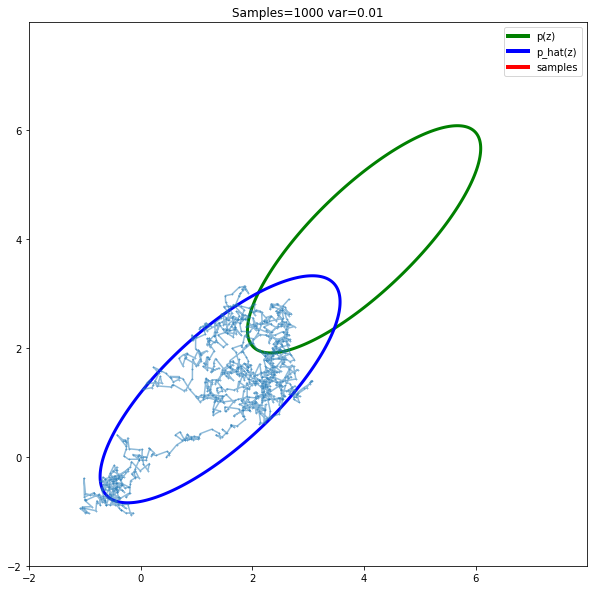

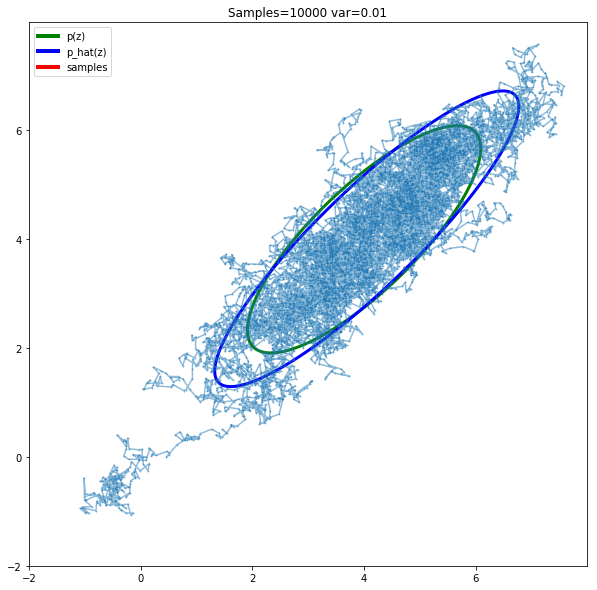

Rejection rate for var= 0.01  = 0.08866411518133765


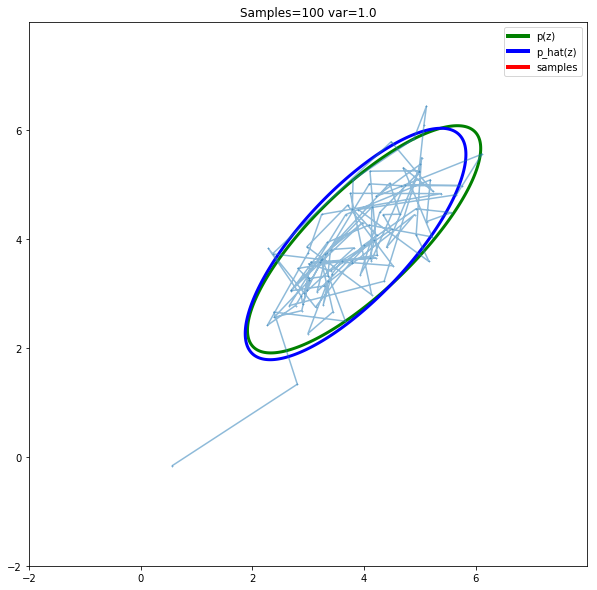

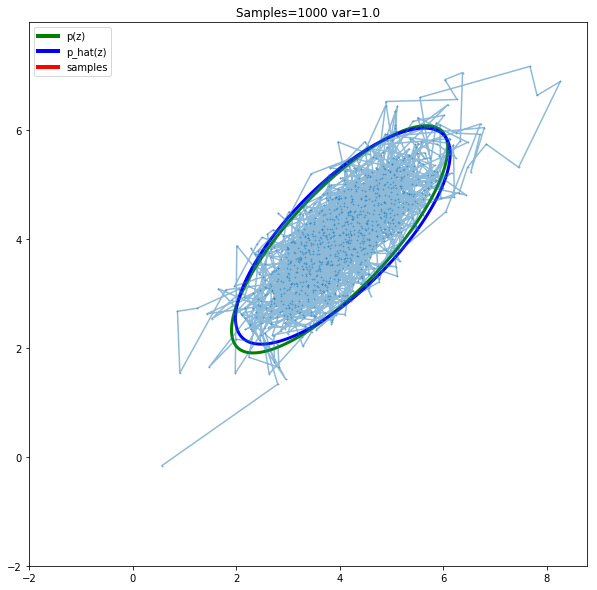

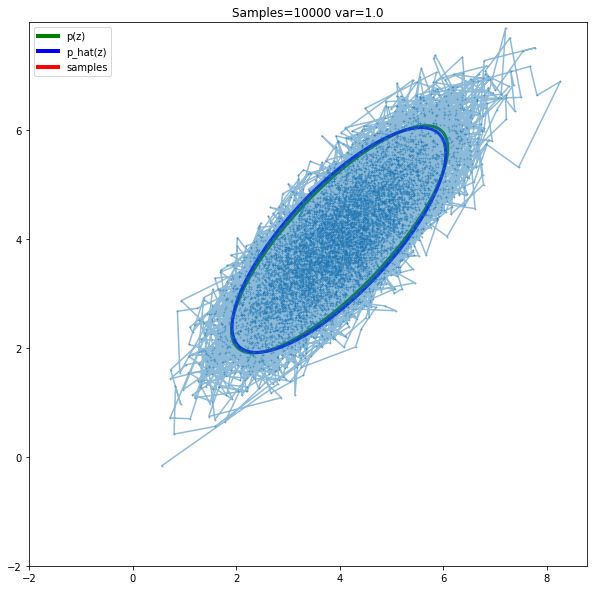

Rejection rate for var= 1.0  = 0.6002957515686823


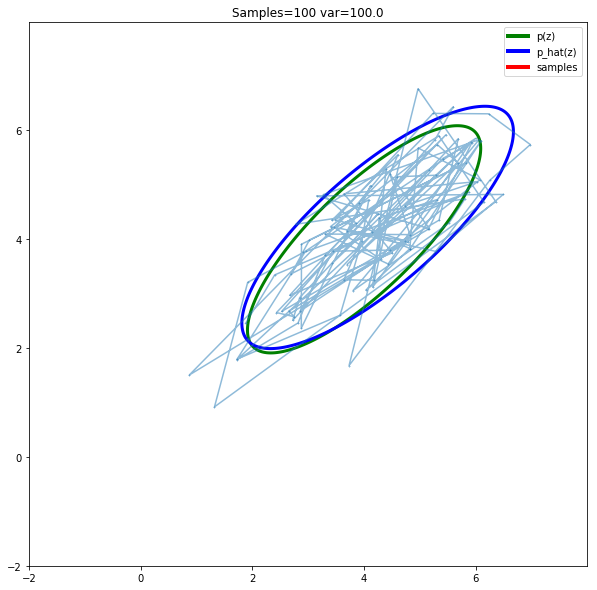

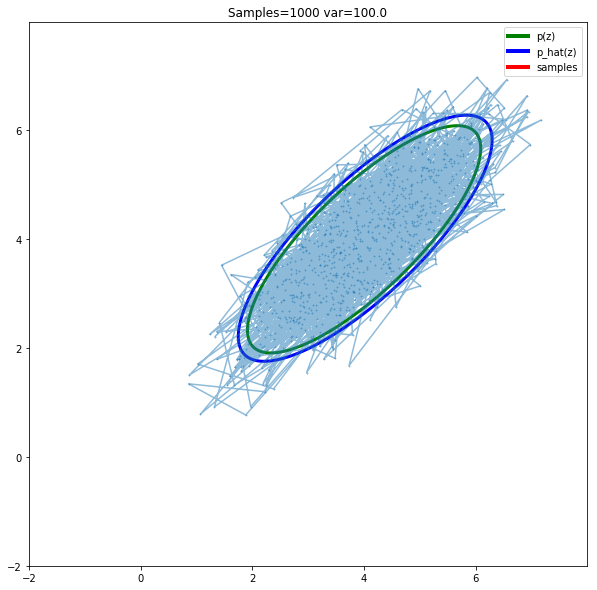

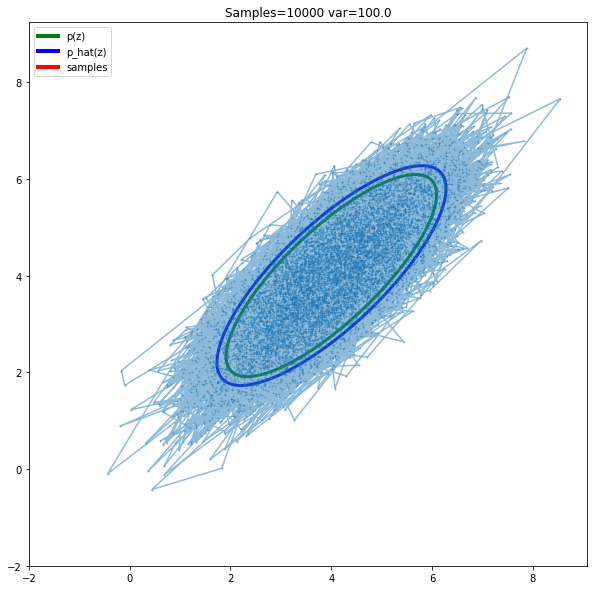

Rejection rate for var= 100.0  = 0.9882071188862973


In [35]:
sigma2 = [0.01, 1.0, 100.0]
z_ = [0, 0]
for i in range(3):
    print("Rejection rate for var=",sigma2[i]," =",MH_sampler(z_, sigma2[i]))